# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta


#### 1.0. Carregando os pacotes necessários e a base de gorjetas

In [32]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

%matplotlib inline

In [2]:
# Carregando a base de dados
tips = load_dataset(name='tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


#### 1.1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  

In [3]:
y, X = patsy.dmatrices(formula_like='tip ~ sex + smoker + time + net_bill', data=tips)

In [4]:
# Ajustando o modelo
model = sm.OLS(y, X)
results = model.fit()


#### 1.2. Remova as variáveis não significantes.  

In [5]:
# Assumindo que um p-valor maior que 0.05 indica que a variável não é significativa.
y, X = patsy.dmatrices(formula_like='tip ~ net_bill', data=tips)
# Ajustando o modelo
modelo_sm1 = sm.OLS(y, X).fit()
print(modelo_sm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           5.02e-23
Time:                        11:35:49   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

#### 1.3. observe o gráfico de resíduos em função de ```net_bill```  


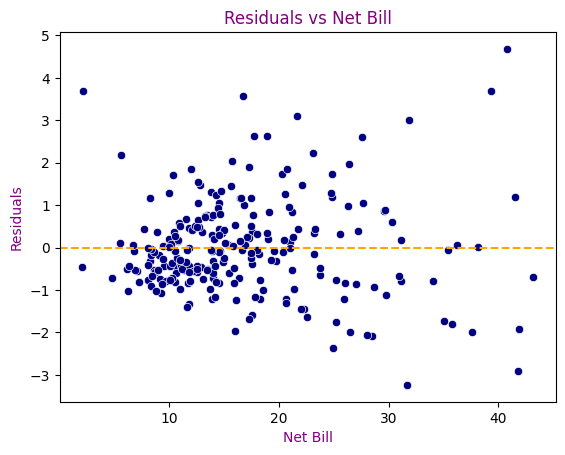

In [6]:
sns.scatterplot(x='net_bill', y=results.resid, data=tips, color = 'navy')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Net Bill', color = 'purple')
plt.ylabel('Residuals', color = 'purple')
plt.title('Residuals vs Net Bill', color = 'purple')
plt.show()


#### 1.4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [7]:
# Transformando net_bill para log
y_log, X_log = patsy.dmatrices('tip ~ np.log(net_bill)', data=tips)
model_log = sm.OLS(y_log, X_log)
results_log = model_log.fit()
print(results_log.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           4.40e-20
Time:                        11:35:56   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

In [8]:
# Transformando net_bill para polinômio de segundo grau
y_poly, X_poly = patsy.dmatrices('tip ~ net_bill + np.power(net_bill, 2)', data=tips)
model_poly = sm.OLS(y_poly, X_poly)
results_poly = model_poly.fit()
print(results_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Sun, 01 Oct 2023   Prob (F-statistic):           4.96e-22
Time:                        11:35:59   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.07

In [9]:
# Comparando os modelos com base no R²
print('`model_log` R²:', results_log.rsquared)
print('`model_poly` R²:', results_poly.rsquared)


`model_log` R²: 0.2944412513792951
`model_poly` R²: 0.3344216007656947


In [10]:
# Escolhendo o melhor modelo com base no maior valor de R²
best_model = 'log' if results_log.rsquared > results_poly.rsquared else 'poly'
print(f'O melhor modelo é com a transformação {best_model} de net_bill.')

O melhor modelo é com a transformação poly de net_bill.


### II. Modelo no valor do percentual da gorjeta


#### 2.1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.

In [11]:
tips['log_tip'] = np.log(tips['tip'])
y_log_tip, X_log_tip = patsy.dmatrices(formula_like='np.log(tip) ~ sex + smoker + time + net_bill', data=tips)

#Ajustando o modelo
model_log_tip = sm.OLS(y_log_tip, X_log_tip)
results_log_tip = model_log_tip.fit()

#### 2.2. Remova as variáveis não significantes.


In [12]:
y, X = patsy.dmatrices(formula_like='np.log(tip) ~ net_bill', data=tips)

#Ajustando o modelo
model_log_tip = sm.OLS(y_log_tip, X_log_tip)
results_log_tip = model_log_tip.fit()

#### 2.3. Observe o gráfico de resíduos em função de ```net_bill```


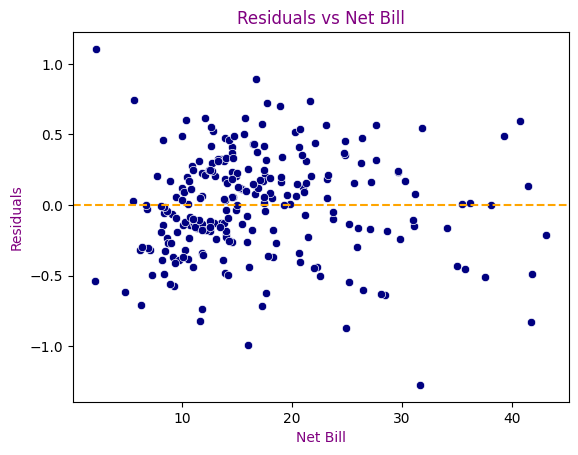

In [13]:
sns.scatterplot(x='net_bill', y=results_log_tip.resid, data=tips, color = 'navy')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Net Bill', color = 'purple')
plt.ylabel('Residuals', color = 'purple')
plt.title('Residuals vs Net Bill', color = 'purple')
plt.show()


#### 2.4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.


In [14]:
y_log_net_bill, X_log_net_bill = patsy.dmatrices('log_tip ~ sex + smoker + time + np.log(net_bill)', data=tips)

#Ajustando o modelo
model_log_net_bill = sm.OLS(y_log_net_bill, X_log_net_bill)
results_log_net_bill = model_log_net_bill.fit()


In [15]:
y_poly_net_bill, X_poly_net_bill = patsy.dmatrices('log_tip ~ sex + smoker + time + net_bill + np.power(net_bill, 2)', data=tips)

#Ajustando o modelo
model_poly_net_bill = sm.OLS(y_poly_net_bill, X_poly_net_bill)
results_poly_net_bill = model_poly_net_bill.fit()

In [16]:
print(f' log: {results_log_net_bill.rsquared}')
print(f' poly: {results_poly_net_bill.rsquared}')


 log: 0.3199911749998886
 poly: 0.3385709725067988


In [19]:
# Melhor modelo
best_model = 'log' if results_log_net_bill.rsquared > results_poly_net_bill.rsquared else 'poly'
print(f'O melhor modelo é com a transformação {best_model} de net_bill, pois é R² maior')

O melhor modelo é com a transformação poly de net_bill, pois é R² maior


#### 2.5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [20]:
tips['pred_tip_log'] = np.exp(results_log_net_bill.fittedvalues)
print('`model_log_net_bill` R²:', tips[['pred_tip_log', 'tip']].corr().iloc[0,1]**2)

tips['pred_tip_pow'] = np.exp(results_poly_net_bill.fittedvalues)
print('`model_poly_net_bill` R²:', tips[['pred_tip_pow', 'tip']].corr().iloc[0,1]**2)

`model_log_net_bill` R²: 0.33087252524120353
`model_poly_net_bill` R²: 0.33462199649317964



> Com base nos coeficientes de determinação (R²), o modelo ***`model_poly_net_bill`*** tem um coeficiente de determinação ligeiramente maior (0.3346) em comparação com o modelo `model_log_net_bill` (0.3309). Isso sugere que o modelo `model_poly_net_bill` pode explicar uma maior proporção da variância na variável dependente (`tip`).

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|



#### 3.0. Carregue a base previsao_de_renda.csv.

In [33]:
# Carregando a base de dados
df = pd.read_csv('previsao_de_renda.csv')


#### 3.1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

In [34]:
# Removendo valores infinitos e NaNs
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()


In [35]:
# Ajustando o modelo de regressão linear simples
reg_renda_simples = smf.ols('renda ~ tempo_emprego', data=df).fit()
df['res_renda_simples'] = reg_renda_simples.resid
print(reg_renda_simples.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:48:00   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409

#### 3.2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

In [46]:
# Calculando os resíduos
residuals = results.resid


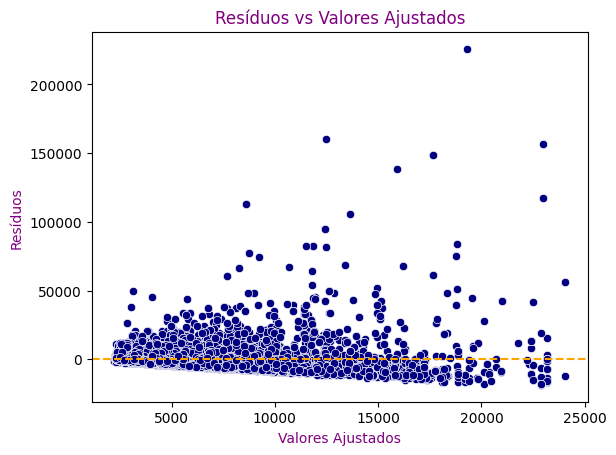

In [47]:
# Verificando a homocedasticidade com um gráfico de dispersão dos resíduos
sns.scatterplot(x=model.fittedvalues, y=residuals, color='navy')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Resíduos vs Valores Ajustados', color='purple')
plt.xlabel('Valores Ajustados', color='purple')
plt.ylabel('Resíduos', color='purple')
plt.show()



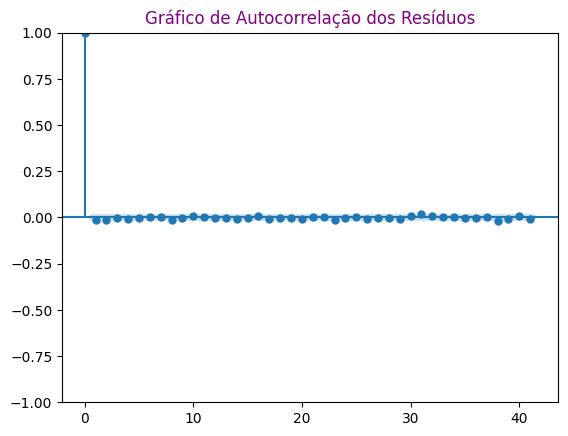

In [48]:

# Verificando a independência dos resíduos com um gráfico de autocorrelação

sm.graphics.tsa.plot_acf(residuals)
plt.title('Gráfico de Autocorrelação dos Resíduos', color='purple')
plt.show()


In [49]:
# Transformando a variável resposta com o logaritmo natural
df['log_renda'] = np.log(df['renda'])
model_log = smf.ols('log_renda ~ tempo_emprego', data=df).fit()
print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:18:27   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851

In [50]:
# Adicionando mais variáveis ao modelo
model_multi = smf.ols('log_renda ~ tempo_emprego + idade + qtd_filhos', data=df).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     865.0
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:18:42   Log-Likelihood:                -15137.
No. Observations:               12427   AIC:                         3.028e+04
Df Residuals:                   12423   BIC:                         3.031e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.7690      0.036    217.881

#### 3.3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.


In [56]:
# Ajustando o modelo de regressão linear múltipla
model = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:23:50   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

#### 3.4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros


In [57]:
# Removendo as variáveis não significativas
insignificant_vars = model.pvalues[model.pvalues > 0.05].index.tolist()
significant_vars = [var for var in df.columns if var not in insignificant_vars]

# Ajustando novamente o modelo com as variáveis significativas
model_sig = smf.ols(f'renda ~ {" + ".join(significant_vars)}', data=df).fit()
print(model_sig.summary())


                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.284e+30
Date:                Sun, 01 Oct 2023   Prob (F-statistic):               0.00
Time:                        12:23:54   Log-Likelihood:             2.7593e+05
No. Observations:               12427   AIC:                        -5.518e+05
Df Residuals:                   12387   BIC:                        -5.515e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

#### 3.5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

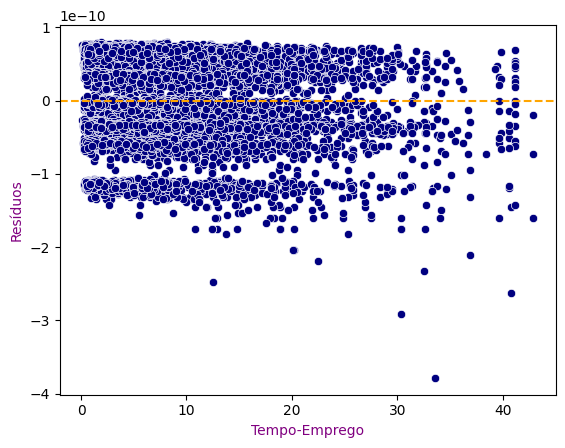

In [66]:
# Calculando os resíduos do modelo múltiplo
residuals_multi = model_sig.resid

# Criando o gráfico de resíduos do modelo múltiplo
sns.scatterplot(x=df['tempo_emprego'], y=residuals_multi, color='navy')
plt.axhline(y=0, color='orange', linestyle='--')
plt.xlabel('Tempo-Emprego', color='purple')
plt.ylabel('Resíduos', color='purple')
plt.show()

